# Singal To Noise All Models
 - Calculates the singal to nosie for all models in longrunmip for GMST
 - Fraction of models stable for windows for GMST
 
 PHD-9:
 * read_and_merge_netcdfs moved from longrunmip_loader to open_ds


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from importlib import reload
import os, sys
import constants
sys.path.append(constants.MODULE_DIR)
import sn_plotting as sn_plot
import xarray_class_accessors as xca
import open_ds
import signal_to_noise as sn
import utils
from typing import List
from classes import ExperimentTypes
warnings.filterwarnings('ignore')
logger = utils.get_notebook_logger()
from pprint import pprint
from functools import partial

In [2]:
import dask.distributed
import tempfile
tempdir = tempfile.TemporaryDirectory('dask-worker-space')
dask.distributed.Client(local_directory=tempdir.name, memory_limit='32gb')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:42487/status,
Dashboard: http://127.0.0.1:42487/status,Workers: 4
Total threads: 16,Total memory: 119.21 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46761,Workers: 4
Dashboard: http://127.0.0.1:42487/status,Total threads: 16
Started: Just now,Total memory: 119.21 GiB
Comm: tcp://127.0.0.1:34391,Total threads: 4
Dashboard: http://127.0.0.1:33967/status,Memory: 29.80 GiB
Nanny: tcp://127.0.0.1:44855,


In [3]:
VARIABLE_INFO = constants.VARIABLE_INFO
VARIABLE_INFO

notebook_number='03_01'

In [4]:
models_to_get =  constants.LONGRUNMIP_MODELS
utils.pprint_list(models_to_get, num_start_items=6)

lenght = 6
 0. ccsm3
 1. cnrmcm61
 2. hadcm3l
 3. ipslcm5a
 4. mpiesm11
 5. mpiesm12


In [5]:
reload(constants)
constants.EXPERIMENTS_TO_RUN

[{'variable': 'tas', 'mask': None, 'hemisphere': 'global'},
 {'variable': 'tas', 'mask': 'land', 'hemisphere': 'global'},
 {'variable': 'pr', 'mask': None, 'hemisphere': 'global'},
 {'variable': 'pr', 'mask': 'land', 'hemisphere': 'global'},
 {'variable': 'tos', 'mask': 'sea', 'hemisphere': 'global'},
 {'variable': 'surf', 'mask': 'sea', 'hemisphere': 'global'},
 {'variable': 'surf', 'mask': 'sea', 'hemisphere': 'northern_hemisphere'},
 {'variable': 'surf', 'mask': 'sea', 'hemisphere': 'southern_hemisphere'}]

In [6]:
%%time
all_experiment_ds, all_control_ds = open_ds.get_all_experiment_ds(constants.EXPERIMENTS_TO_RUN,
                                                          constants.LONGRUNMIP_DIR, models_to_get)
all_experiment_ds


- {'variable': 'tas', 'mask': None, 'hemisphere': 'global'}
- Removing first 10 steps
ccsm3, cnrmcm61, hadcm3l, ipslcm5a, mpiesm11, mpiesm12, 
- {'variable': 'tas', 'mask': 'land', 'hemisphere': 'global'}
- Removing first 10 steps
ccsm3, cnrmcm61, hadcm3l, ipslcm5a, mpiesm11, mpiesm12, 
- {'variable': 'pr', 'mask': None, 'hemisphere': 'global'}
- Removing first 10 steps
ccsm3, cnrmcm61, hadcm3l, ipslcm5a, mpiesm11, mpiesm12, 
- {'variable': 'pr', 'mask': 'land', 'hemisphere': 'global'}
- Removing first 10 steps
ccsm3, cnrmcm61, hadcm3l, ipslcm5a, mpiesm11, mpiesm12, 
- {'variable': 'tos', 'mask': 'sea', 'hemisphere': 'global'}
- Removing first 10 steps
- Removing first 200 steps
ccsm3, cnrmcm61, hadcm3l, ipslcm5a, mpiesm11, mpiesm12, 
- {'variable': 'surf', 'mask': 'sea', 'hemisphere': 'global'}
- model='ipslcm5a' - found_fname=None - No file found
- model='ipslcm5a' - found_fname=None - No file found
- Removing first 10 steps
ccsm3, cnrmcm61, hadcm3l, mpiesm11, mpiesm12, 
- {'variabl

<xarray.Dataset>
Dimensions:                       (model: 6, time: 4459)
Coordinates:
  * model                         (model) <U8 'ccsm3' 'cnrmcm61' ... 'mpiesm12'
  * time                          (time) object 0001-12-31 00:00:00 ... 4459-...
Data variables:
    tas_global                    (model, time) float64 2.281 2.565 ... nan nan
    tas_land_global               (model, time) float64 3.075 3.226 ... nan nan
    pr_global                     (model, time) float64 28.52 48.32 ... nan nan
    pr_land_global                (model, time) float64 51.81 129.5 ... nan nan
    tos_sea_global                (model, time) float64 1.303 1.659 ... nan nan
    surf_sea_global               (model, time) float64 6.849 4.983 ... nan nan
    surf_sea_northern_hemisphere  (model, time) float64 9.456 6.503 ... nan nan
    surf_sea_southern_hemisphere  (model, time) float64 5.029 3.922 ... nan nan

In [7]:
max_effective_length = 850#sn.get_upper_lim(all_experiment_ds, MULTI_WINDOW_RUN_PARAMS['end_window']) # Broken
max_effective_length

850

In [8]:
constants.MULTI_WINDOW_RUN_PARAMS

{'start_window': 10, 'end_window': 152, 'step_window': 1}

In [9]:
%%time
stable_sn_ds, unstable_sn_ds = all_experiment_ds.sn_ds.sn_multiwindow(all_control_ds,
            **constants.MULTI_WINDOW_RUN_PARAMS, parallel=True)

- 
====tas_global


Experiment
--------

range(10, 152)
10, 28, 22, 25, 13, 19, 16, 31, 37, 34, 40, 43, 52, 46, 49, 55, 53, 44, 26, 29, 11, 23, 35, 32, 47, 41, 38, 14, 17, 20, 56, 50, 48, 54, 36, 24, 33, 12, 39, 27, 21, 30, 45, 15, 18, 57, 42, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 51, 88, 91, 94, 65, 68, 62, 97, 74, 100, 77, 71, 83, 59, 86, 80, 89, 92, 69, 66, 95, 63, 98, 75, 103, 78, 72, 84, 101, 87, 81, 90, 93, 106, 109, 96, 99, 112, 115, 118, 60, 102, 121, 104, 124, 127, 130, 133, 107, 110, 136, 119, 139, 142, 145, 113, 122, 148, 125, 116, 105, 131, 111, 128, 137, 108, 120, 143, 114, 146, 134, 140, 149, 123, 126, 151, 117, 138, 132, 129, 135, 144, 150, 141, 147, 
Control
------

range(10, 152)
10, 13, 16, 22, 19, 25, 28, 31, 37, 34, 40, 46, 49, 43, 52, 55, 23, 26, 29, 14, 11, 38, 35, 50, 20, 32, 53, 56, 41, 17, 47, 44, 27, 30, 36, 51, 15, 21, 33, 54, 24, 57, 42, 12, 39, 58, 61, 64, 67, 70, 73, 76, 48, 79, 82, 18, 45, 85, 88, 91, 62, 65, 59, 71, 94, 77, 74, 68, 97, 100, 86, 89, 66,

- 
====surf_sea_southern_hemisphere


Experiment
--------

range(10, 152)
13, 16, 31, 19, 10, 22, 34, 25, 28, 37, 49, 40, 43, 46, 55, 52, 61, 58, 64, 76, 73, 79, 82, 70, 67, 85, 88, 91, 94, 97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130, 136, 133, 139, 142, 145, 148, 151, - !!!!!!!!!!!!!!!!!!!!!!


surf_sea_southern_hemisphere has error 
 <xarray.DataArray 'surf_sea_southern_hemisphere' (model: 6, time: 0)>
array([], shape=(6, 0), dtype=float64)
Coordinates:
  * model    (model) <U8 'ccsm3' 'cnrmcm61' 'hadcm3l' ... 'mpiesm11' 'mpiesm12'
  * time     (time) object  
 <xarray.DataArray 'surf_sea_southern_hemisphere' (model: 6, time: 0)>
array([], shape=(6, 0), dtype=float64)
Coordinates:
  * model    (model) <U8 'ccsm3' 'cnrmcm61' 'hadcm3l' ... 'mpiesm11' 'mpiesm12'
  * time     (time) object 


!!!!!!!!!!!!!!!!!!!!!!
CPU times: user 38.1 s, sys: 13.3 s, total: 51.4 s
Wall time: 3min 50s


In [10]:
stable_year_ds = sn.get_dataset_stable_year_multi_window(unstable_sn_ds)
stable_year_ds

Replacing points greater than 992 with 993
Replacing points greater than 992 with 993
Replacing points greater than 992 with 993
Replacing points greater than 992 with 993
Replacing points greater than 992 with 993


<xarray.Dataset>
Dimensions:   (model: 6, window: 142, variable: 5)
Coordinates:
  * model     (model) <U8 'ccsm3' 'cnrmcm61' 'hadcm3l' ... 'mpiesm11' 'mpiesm12'
  * window    (window) int64 10 11 12 13 14 15 16 ... 146 147 148 149 150 151
  * variable  (variable) <U15 'tas_global' ... 'tos_sea_global'
Data variables:
    time      (variable, window, model) int64 21 48 16 31 28 ... 850 850 790 850

In [11]:
constants.WINDOWS_OF_INTEREST

[20, 80, 150]

In [12]:
def get_order_of_stabilisation(ds, window_range_tuple: tuple) -> dict:
    
    slice_mean_da_dict = stable_year_ds_mean.sel(
        window=slice(*window_range_tuple)).mean(dim='window').to_dict()
    coords = slice_mean_da_dict['coords']['variable']['data']
    data = np.round(slice_mean_da_dict['data_vars']['time']['data'], 0)
    args_sort = np.argsort(data)
    

    return {coords[arg]: data[arg] for arg in args_sort}

In [13]:
stable_year_ds_mean = stable_year_ds.mean(dim='model')

In [14]:
WINDOW_RANGES = ((10, 30), (70, 90), (130, 150))

In [15]:
stable_order_dict = {}
for window_range_tuple in WINDOW_RANGES:
    stable_order_dict[window_range_tuple] = get_order_of_stabilisation(stable_year_ds_mean, window_range_tuple)


In [16]:
stable_order_dict

{(10, 30): {'pr_land_global': 7.0,
  'tas_land_global': 34.0,
  'pr_global': 42.0,
  'tas_global': 44.0,
  'tos_sea_global': 63.0},
 (70, 90): {'pr_land_global': 39.0,
  'tas_land_global': 221.0,
  'pr_global': 304.0,
  'tas_global': 353.0,
  'tos_sea_global': 468.0},
 (130, 150): {'pr_land_global': 86.0,
  'pr_global': 591.0,
  'tas_land_global': 665.0,
  'tas_global': 743.0,
  'tos_sea_global': 817.0}}

# Plotting

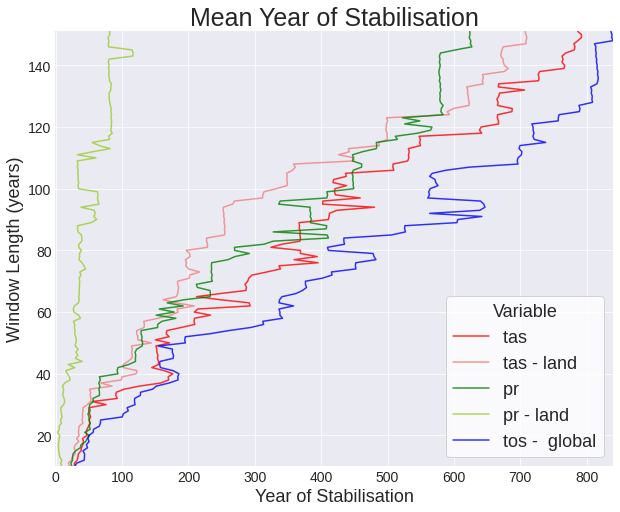

In [31]:
reload(sn_plot)
fig, ax = sn_plot.plot_year_of_stability(stable_year_ds.mean(dim='model'), 'variable', 
                                         title='Mean Year of Stabilisation')
save_name = os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL,
                         f'{notebook_number}_mean_multivariate_year_of_stabilisation.png')
fig.savefig(save_name, dpi=200, bbox_inches='tight')

/home/563/ab2313/gdata/images/PhD/top_level/03_01_ccsm3_multivariate_year_of_stabilisation.png
/home/563/ab2313/gdata/images/PhD/top_level/03_01_cnrmcm61_multivariate_year_of_stabilisation.png
/home/563/ab2313/gdata/images/PhD/top_level/03_01_hadcm3l_multivariate_year_of_stabilisation.png
/home/563/ab2313/gdata/images/PhD/top_level/03_01_ipslcm5a_multivariate_year_of_stabilisation.png
/home/563/ab2313/gdata/images/PhD/top_level/03_01_mpiesm11_multivariate_year_of_stabilisation.png
/home/563/ab2313/gdata/images/PhD/top_level/03_01_mpiesm12_multivariate_year_of_stabilisation.png


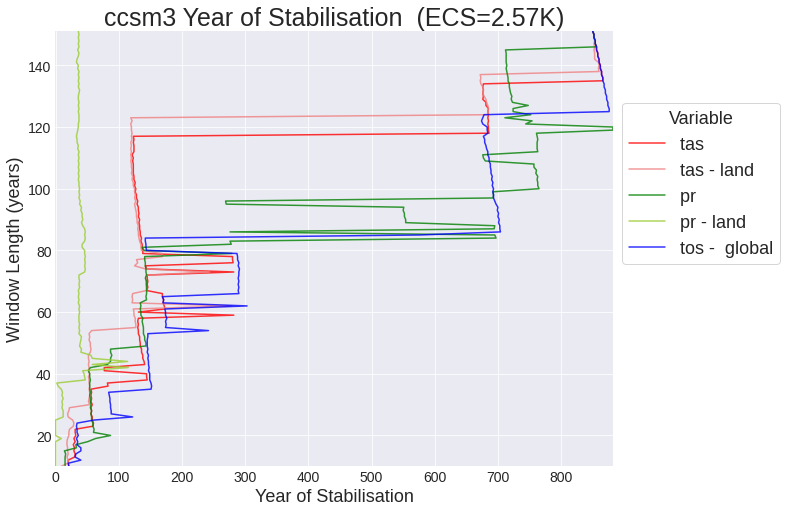

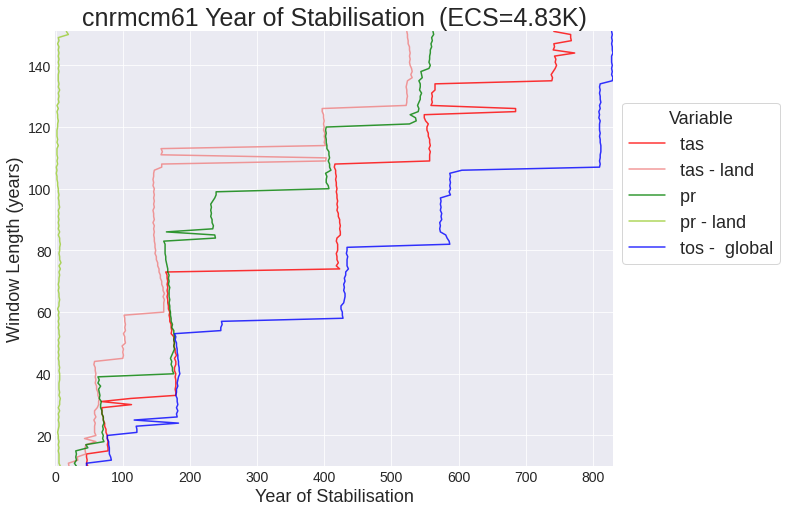

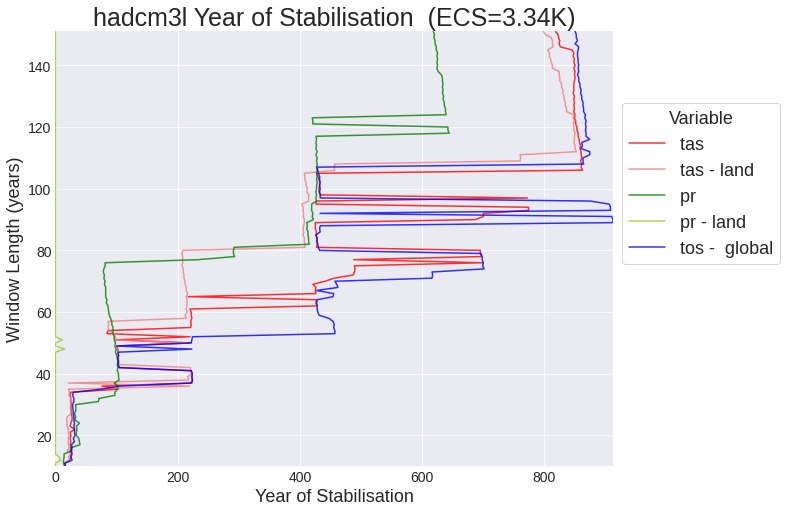

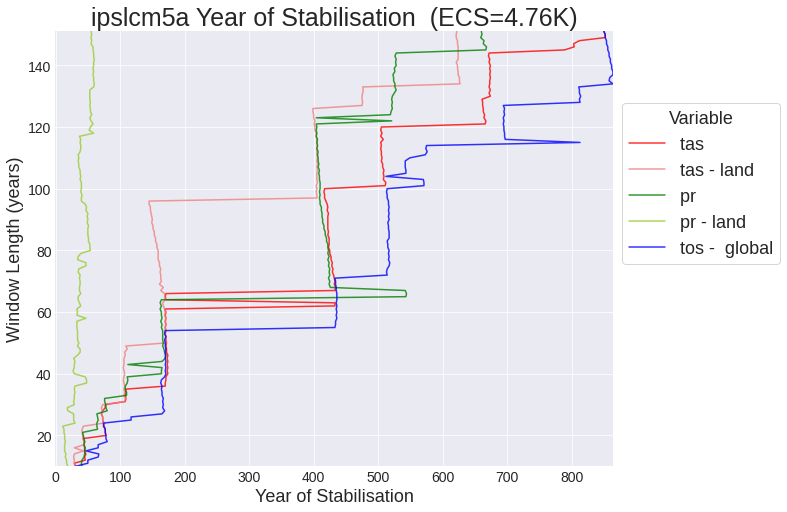

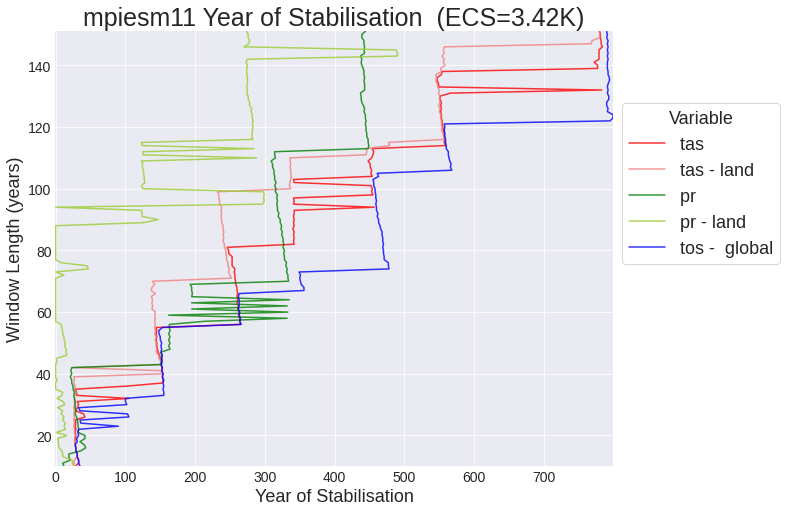

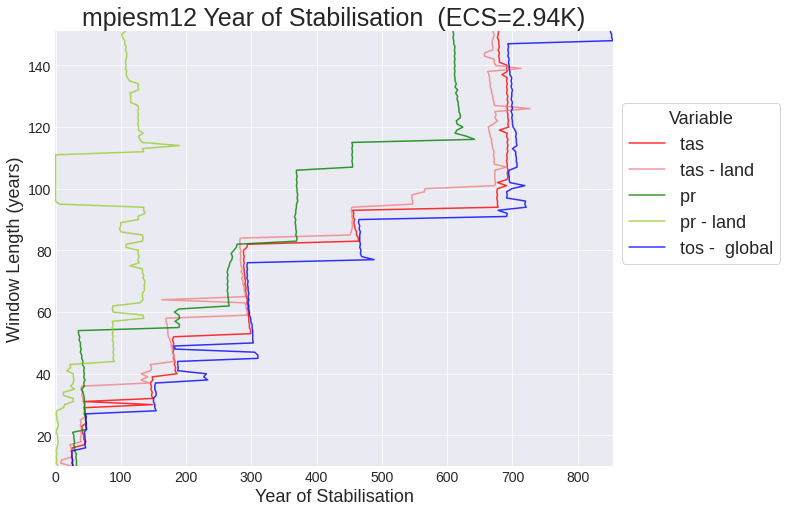

In [26]:
for model in stable_year_ds.model.values:
    fig, ax = sn_plot.plot_year_of_stability(stable_year_ds.sel(model=model), 'variable')
    save_name = os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL,
                             f'{notebook_number}_{model}_multivariate_year_of_stabilisation.png')
    print(save_name)
#     fig.savefig(save_name, dpi=200, bboox_inches='tight')

In [19]:
def scatter_ecs_vs_stabilisation_year(fig, ax, da: xr.DataArray, marker='o'):
    '''
    Scatter plot of the ECS vs the year of stability for a model
    
    '''
    
    MODEL_ECS = {model: value['ECS'] for model, value in constants.MODEL_PARAMS.items()
                if model in da.model.values}

    for model in list(MODEL_ECS):
        pt = [float(da.sel(model=model).time.values), MODEL_ECS[model]]
        ax.scatter(*pt, label=model, c = constants.MODEL_PARAMS[model]['color'], marker=marker)
        
    ax.set_title(f'{str(da.window.values)} Year Window Length', fontsize=12)
    ax.set_xlabel('Year of Stabilisation', size=12)

In [20]:
def ecs_vs_year_or_stabilisation_multipannel(ds: xr.Dataset, windows: List[int], 
                                            variable: str = None) -> (plt.figure, List[plt.axes]):

    fig = plt.figure(figsize=(15, 6))
    axes = []

    for i, window in enumerate(windows):
        ax = fig.add_subplot(1,3,i+1)
        axes.append(ax)

        da = ds.sel(window=window)
        scatter_ecs_vs_stabilisation_year(fig, ax, da)

    axes[0].set_ylabel('ECS (K)', size=12)
    leg = axes[1].legend(ncol=len(da.model.values), fontsize = 12, bbox_to_anchor=[1.8, 1.22], frameon=True) 
    leg.set_title('Model')
    leg.get_title().set_fontsize('12')
    
    variable_split = variable.split('_')
    longname = constants.VARIABLE_INFO[variable_split[0]]['longname'] if variable else ''
    hemishere = variable_split[-1].strip().capitalize()
    mask = f'({variable_split[1]} only)' if len(variable_split) > 2 else ''
         
    fig.suptitle(f'{hemishere} {longname} {mask}\nECS vs. Year Of Stabilisation ', 
                 y=1.15, fontsize=21);
    return fig, axes

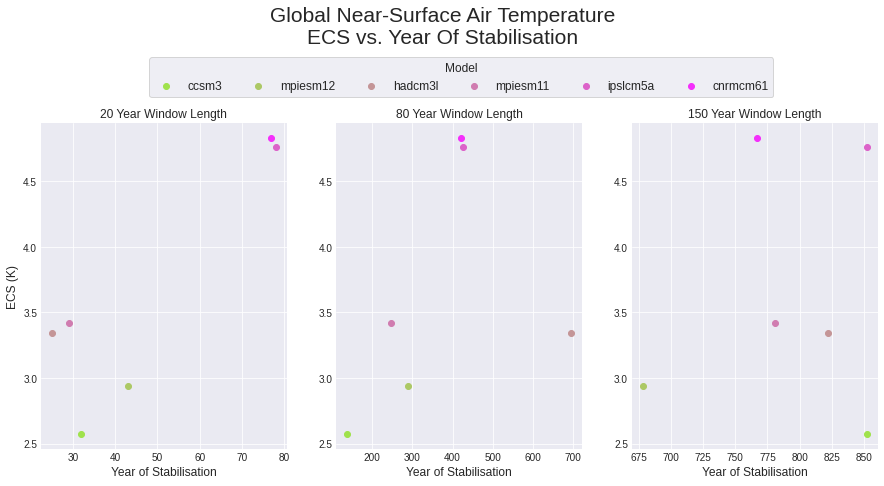

In [21]:
variable = 'tas_global'
fig, axes = ecs_vs_year_or_stabilisation_multipannel(
            stable_year_ds.sel(variable=variable), constants.WINDOWS_OF_INTEREST, variable) 

save_name = os.path.join(
    constants.IMAGE_SAVE_DIR_TOP_LEVEL,
    f'{notebook_number}_{variable}_ecs_vs_stable_year_scatter.png')
# fig.savefig(save_name, dpi=200, bbox_inches='tight')

tas_global
tas_land_global
pr_global
pr_land_global
tos_sea_global


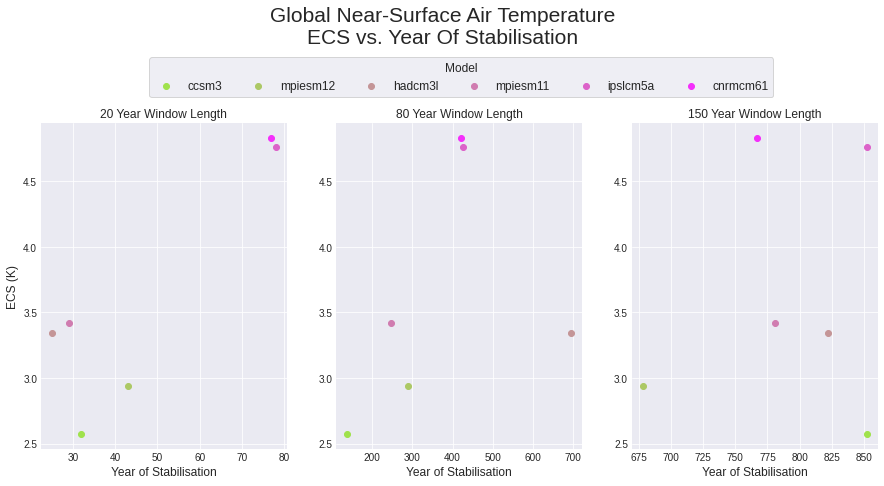

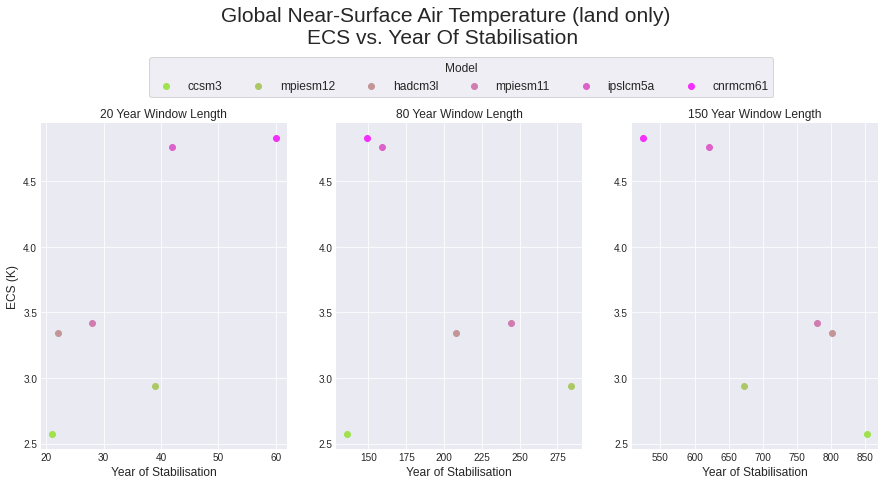

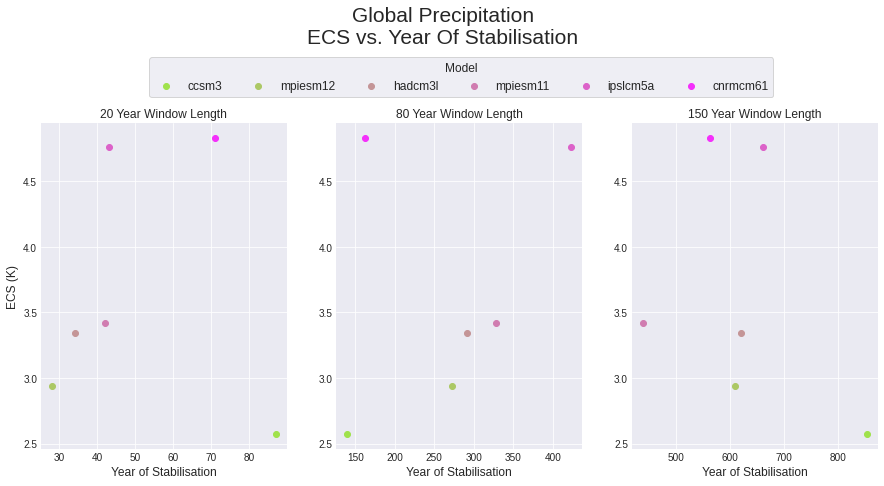

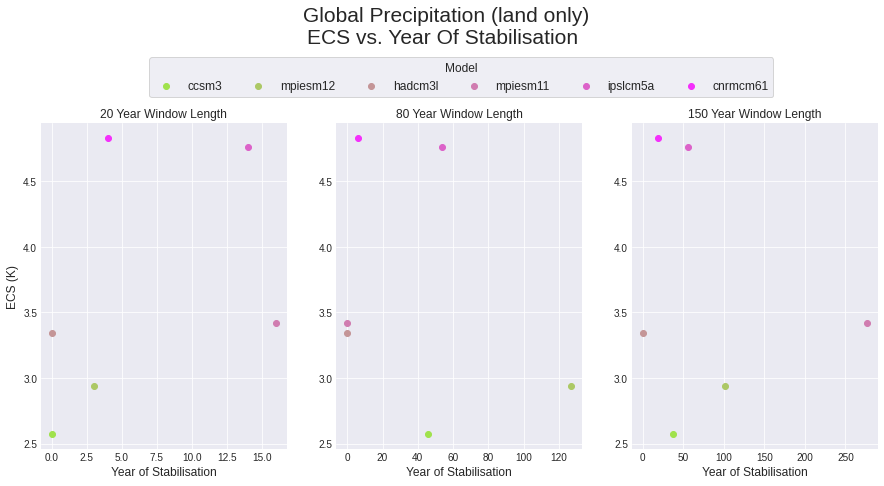

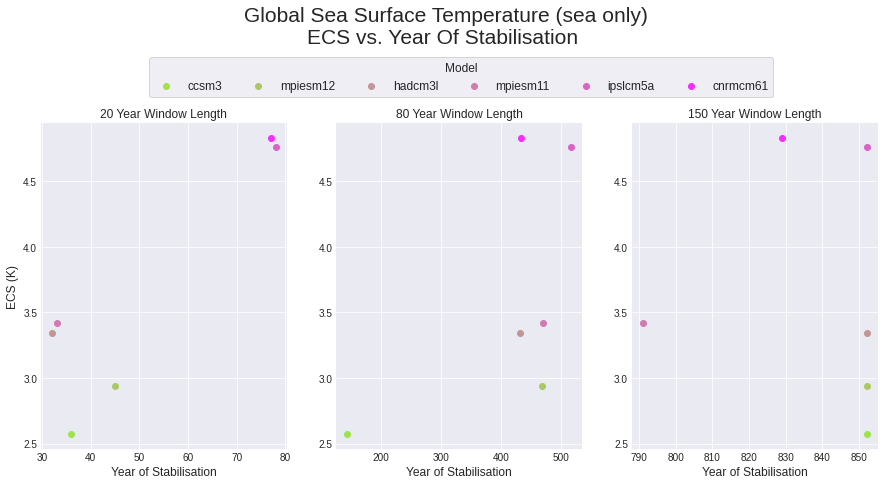

In [22]:
for variable in stable_year_ds.variable.values:
    print(variable)
    fig, axes = ecs_vs_year_or_stabilisation_multipannel(
                stable_year_ds.sel(variable=variable), constants.WINDOWS_OF_INTEREST, variable) 

    save_name = os.path.join(
        constants.IMAGE_SAVE_DIR_TOP_LEVEL,
        f'{notebook_number}_{variable}_ecs_vs_stable_year_scatter.png')
#     fig.savefig(save_name, dpi=200, bbox_inches='tight')